<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
!دیتیلد بوستون
</font>
</h1>


In [1]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن داده‌ها
</font>
</h2>


In [2]:
df = pd.read_csv('BostonHousing.csv')

In [3]:
df.shape

(506, 14)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
توصیف آماری دیتافریم
</font>
</h2>


In [4]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رسم هیستوگرام برای نمودار مالیات
</font>
</h2>



Text(0, 0.5, 'Frequency')

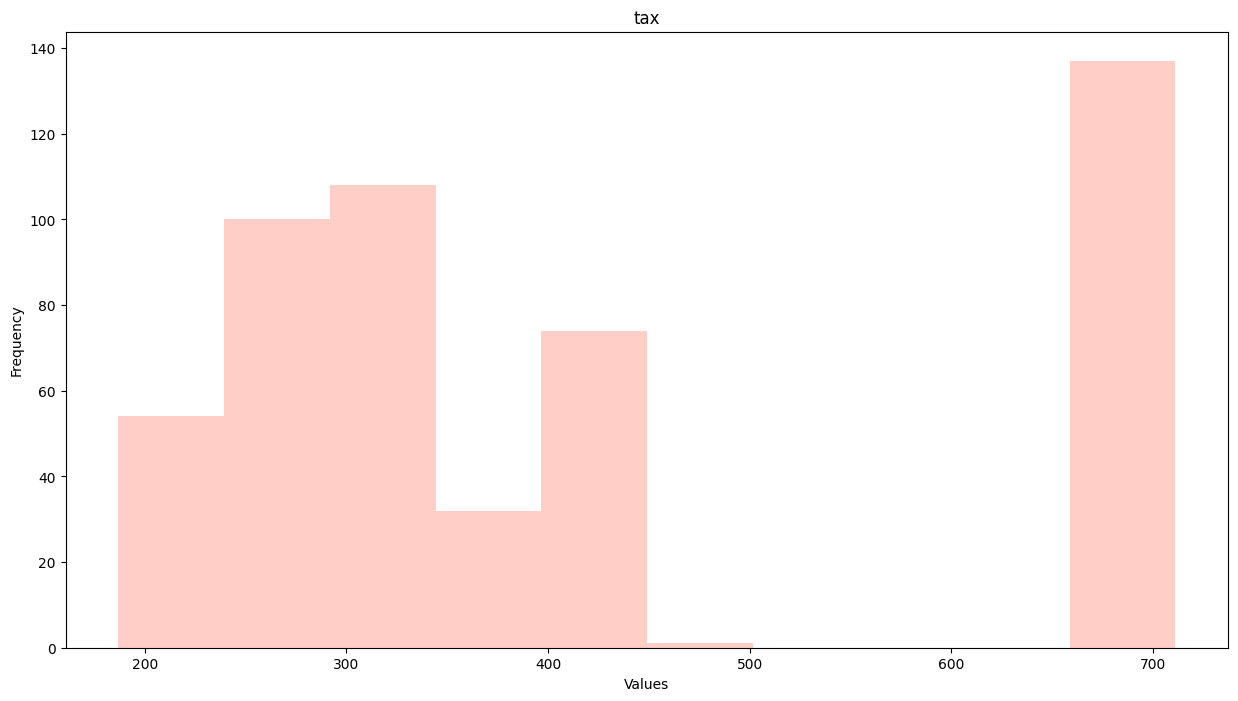

In [5]:
fig, ax = plt.subplots(1,1, figsize = (15, 8))
ax.hist(df.tax, color = 'tomato', alpha = 0.3)
ax.set_title('tax')
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رسم ماتریس همبستگی
</font>
</h2>



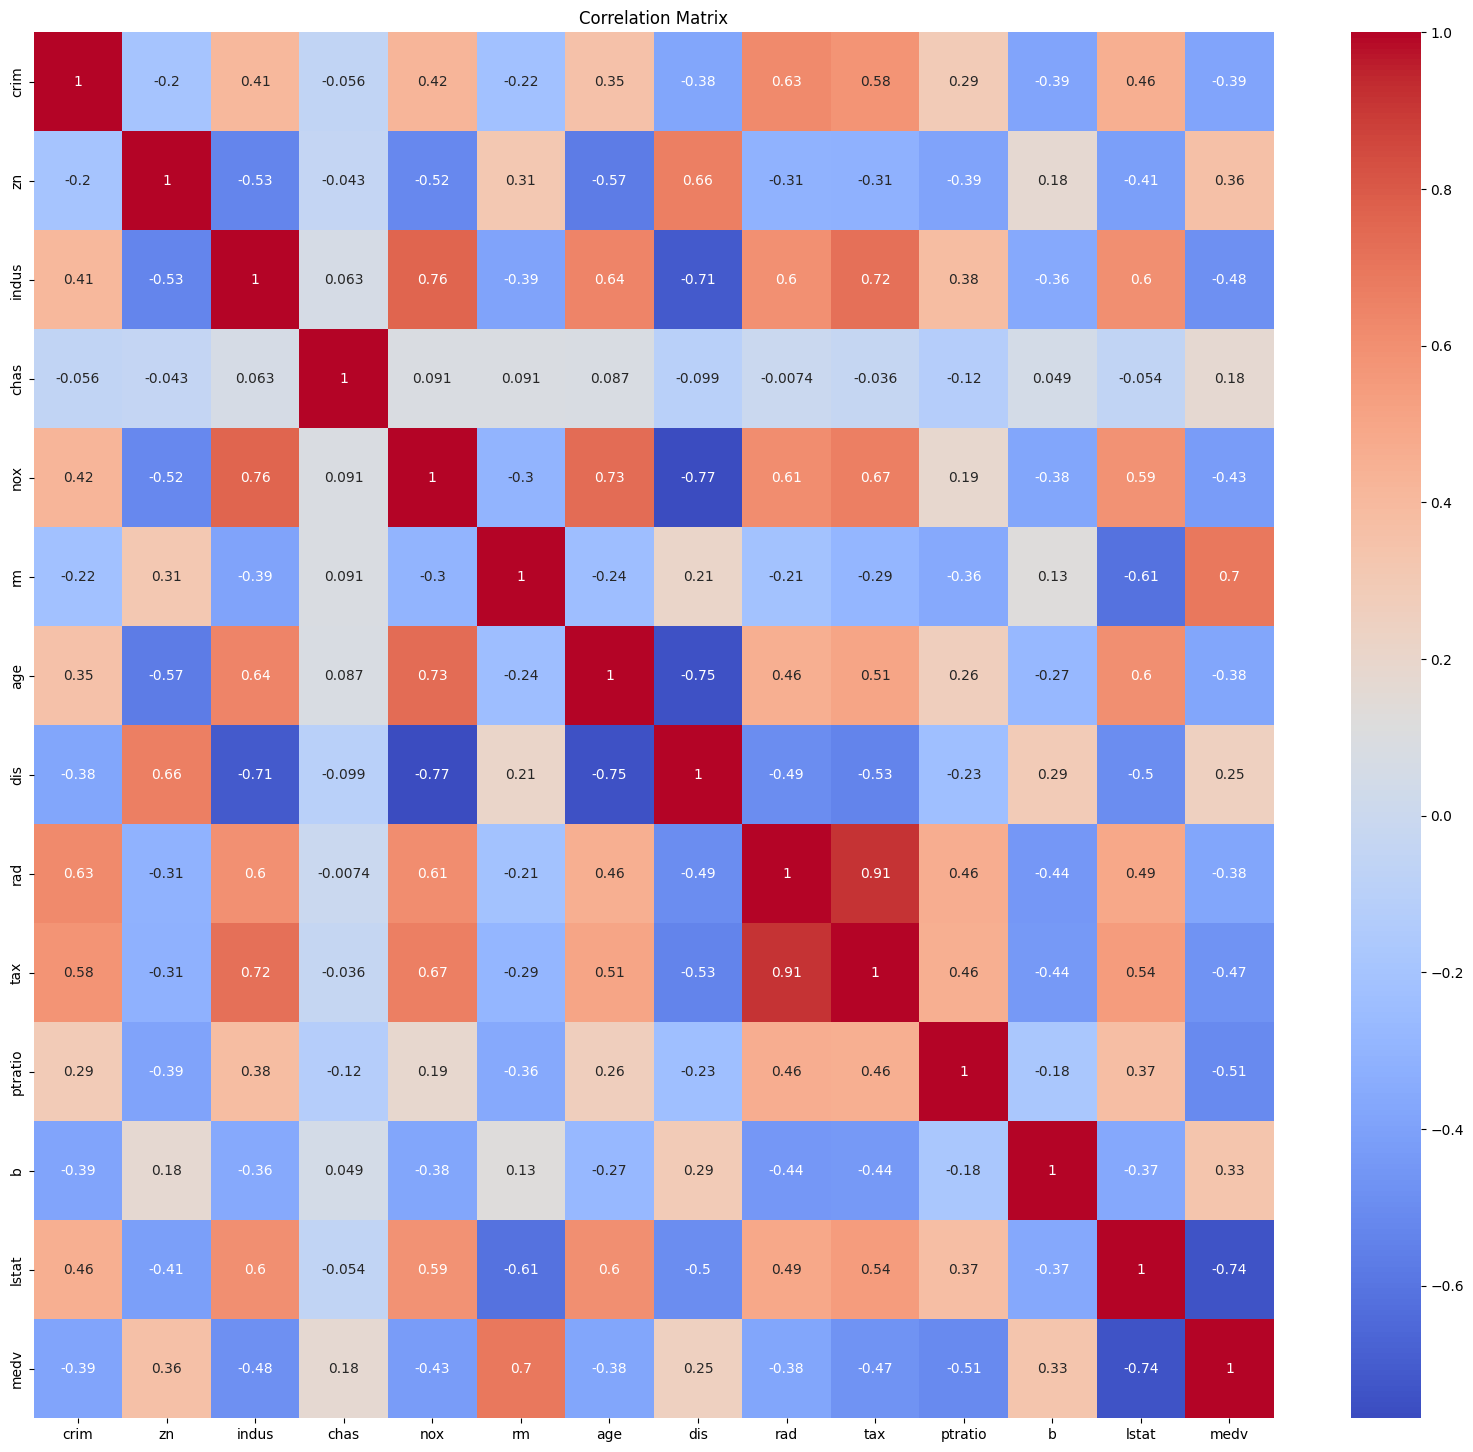

In [6]:
corr_df = df.corr()
x_y_label = [i for i in df.columns]
plt.figure(figsize=(20,18))
plot = sns.heatmap(corr_df, cmap = 'coolwarm', annot=True, xticklabels=x_y_label, yticklabels=x_y_label)
plot.set_title('Correlation Matrix')
plt.show()


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رسم نمودار جعبه‌ای
</font>
</h2>




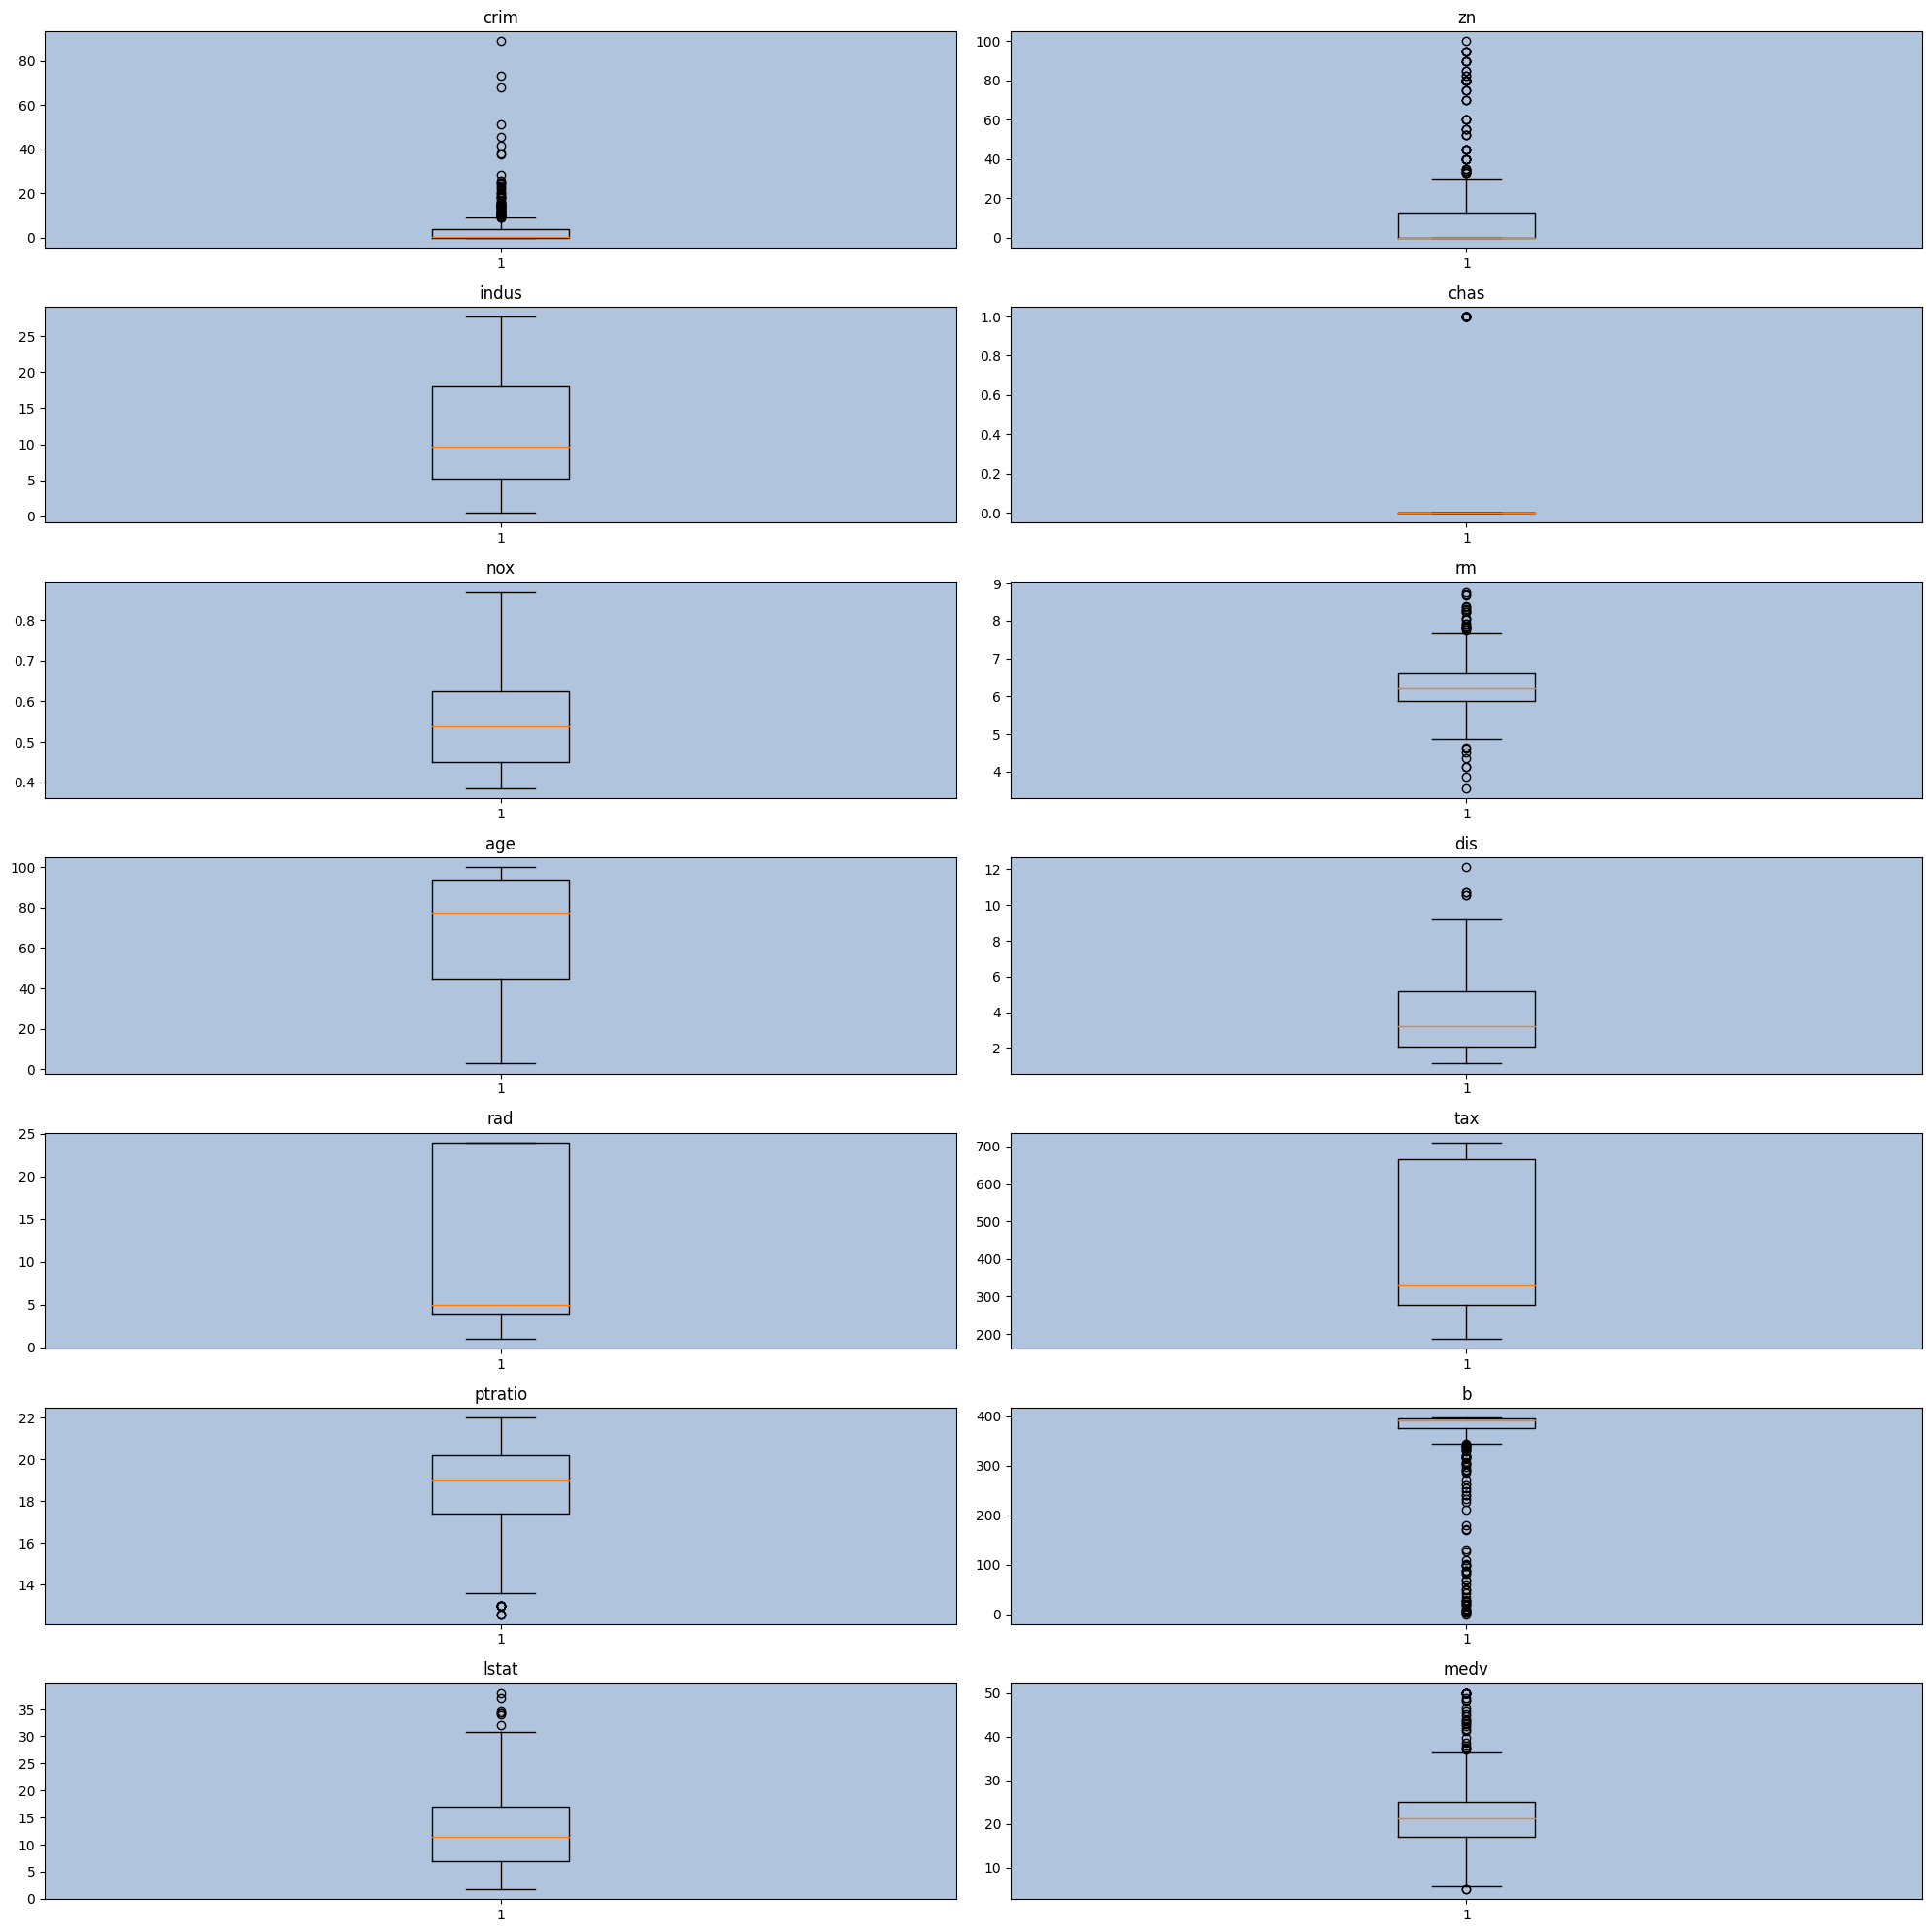

In [7]:
columns = df.columns
fig, axes = plt.subplots(7,2, figsize = (20,20))
axes = axes.flatten()
for i in range(len(df.columns)):
    axes[i].boxplot(df[columns[i]])
    axes[i].set_facecolor('lightsteelblue')
    axes[i].set_title(columns[i])
plt.tight_layout()
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدیریت داده‌های پرت
۱
</font>
</h2>


In [8]:
df_rep = df.copy()

In [9]:
df_rep = df_rep.drop('chas', axis=1)

In [10]:
def iqr_based_filter(columns):
    q1, q3 = columns.quantile(0.25), columns.quantile(0.75)
    iqr = q3 - q1
    outliers_low = []
    for i in columns:
        if i < (q1 - 1.5 * iqr):
            i = q1
        elif  i > (q1 + 1.5 * iqr):
            i = q3
        outliers_low.append(i)
    return outliers_low

In [11]:
df_rep = df_rep.apply(iqr_based_filter, axis=0)

In [12]:
df_rep = pd.concat([df_rep, df['chas']], axis=1)


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از تغییر داده‌های پرت مجدداً با متد <code>describe</code> اطلاعات دیتافریم <code>df_rep</code> را به‌دست آورده و سپس نمودار جعبه‌ای را مشابه قسمت قبل برای داده‌های تغییر یافته (پس از مدیریت داده‌های پرت) رسم نمایید.
</font>
</p>


In [13]:
df_rep.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,chas
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.276262,3.331028,10.937075,0.537316,6.190288,68.574901,3.478726,9.549407,408.237154,18.581225,386.677505,11.512016,20.202273,0.069170
std,1.608039,5.565239,6.521318,0.087789,0.440458,28.148861,1.543847,8.707259,168.537116,1.937944,11.354134,5.135607,5.070967,0.253994
min,0.006320,0.000000,0.460000,0.385000,4.880000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,5.600000,0.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885875,45.025000,2.100175,4.000000,279.000000,17.400000,375.413125,6.950000,17.043750,0.000000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.676229,12.500000,18.100000,0.624000,6.622375,94.075000,5.170819,24.000000,666.000000,20.200000,396.225000,16.951250,25.000000,0.000000
max,5.441140,18.000000,21.890000,0.700000,6.982000,100.000000,6.640700,24.000000,711.000000,21.200000,396.900000,21.780000,28.700000,1.000000


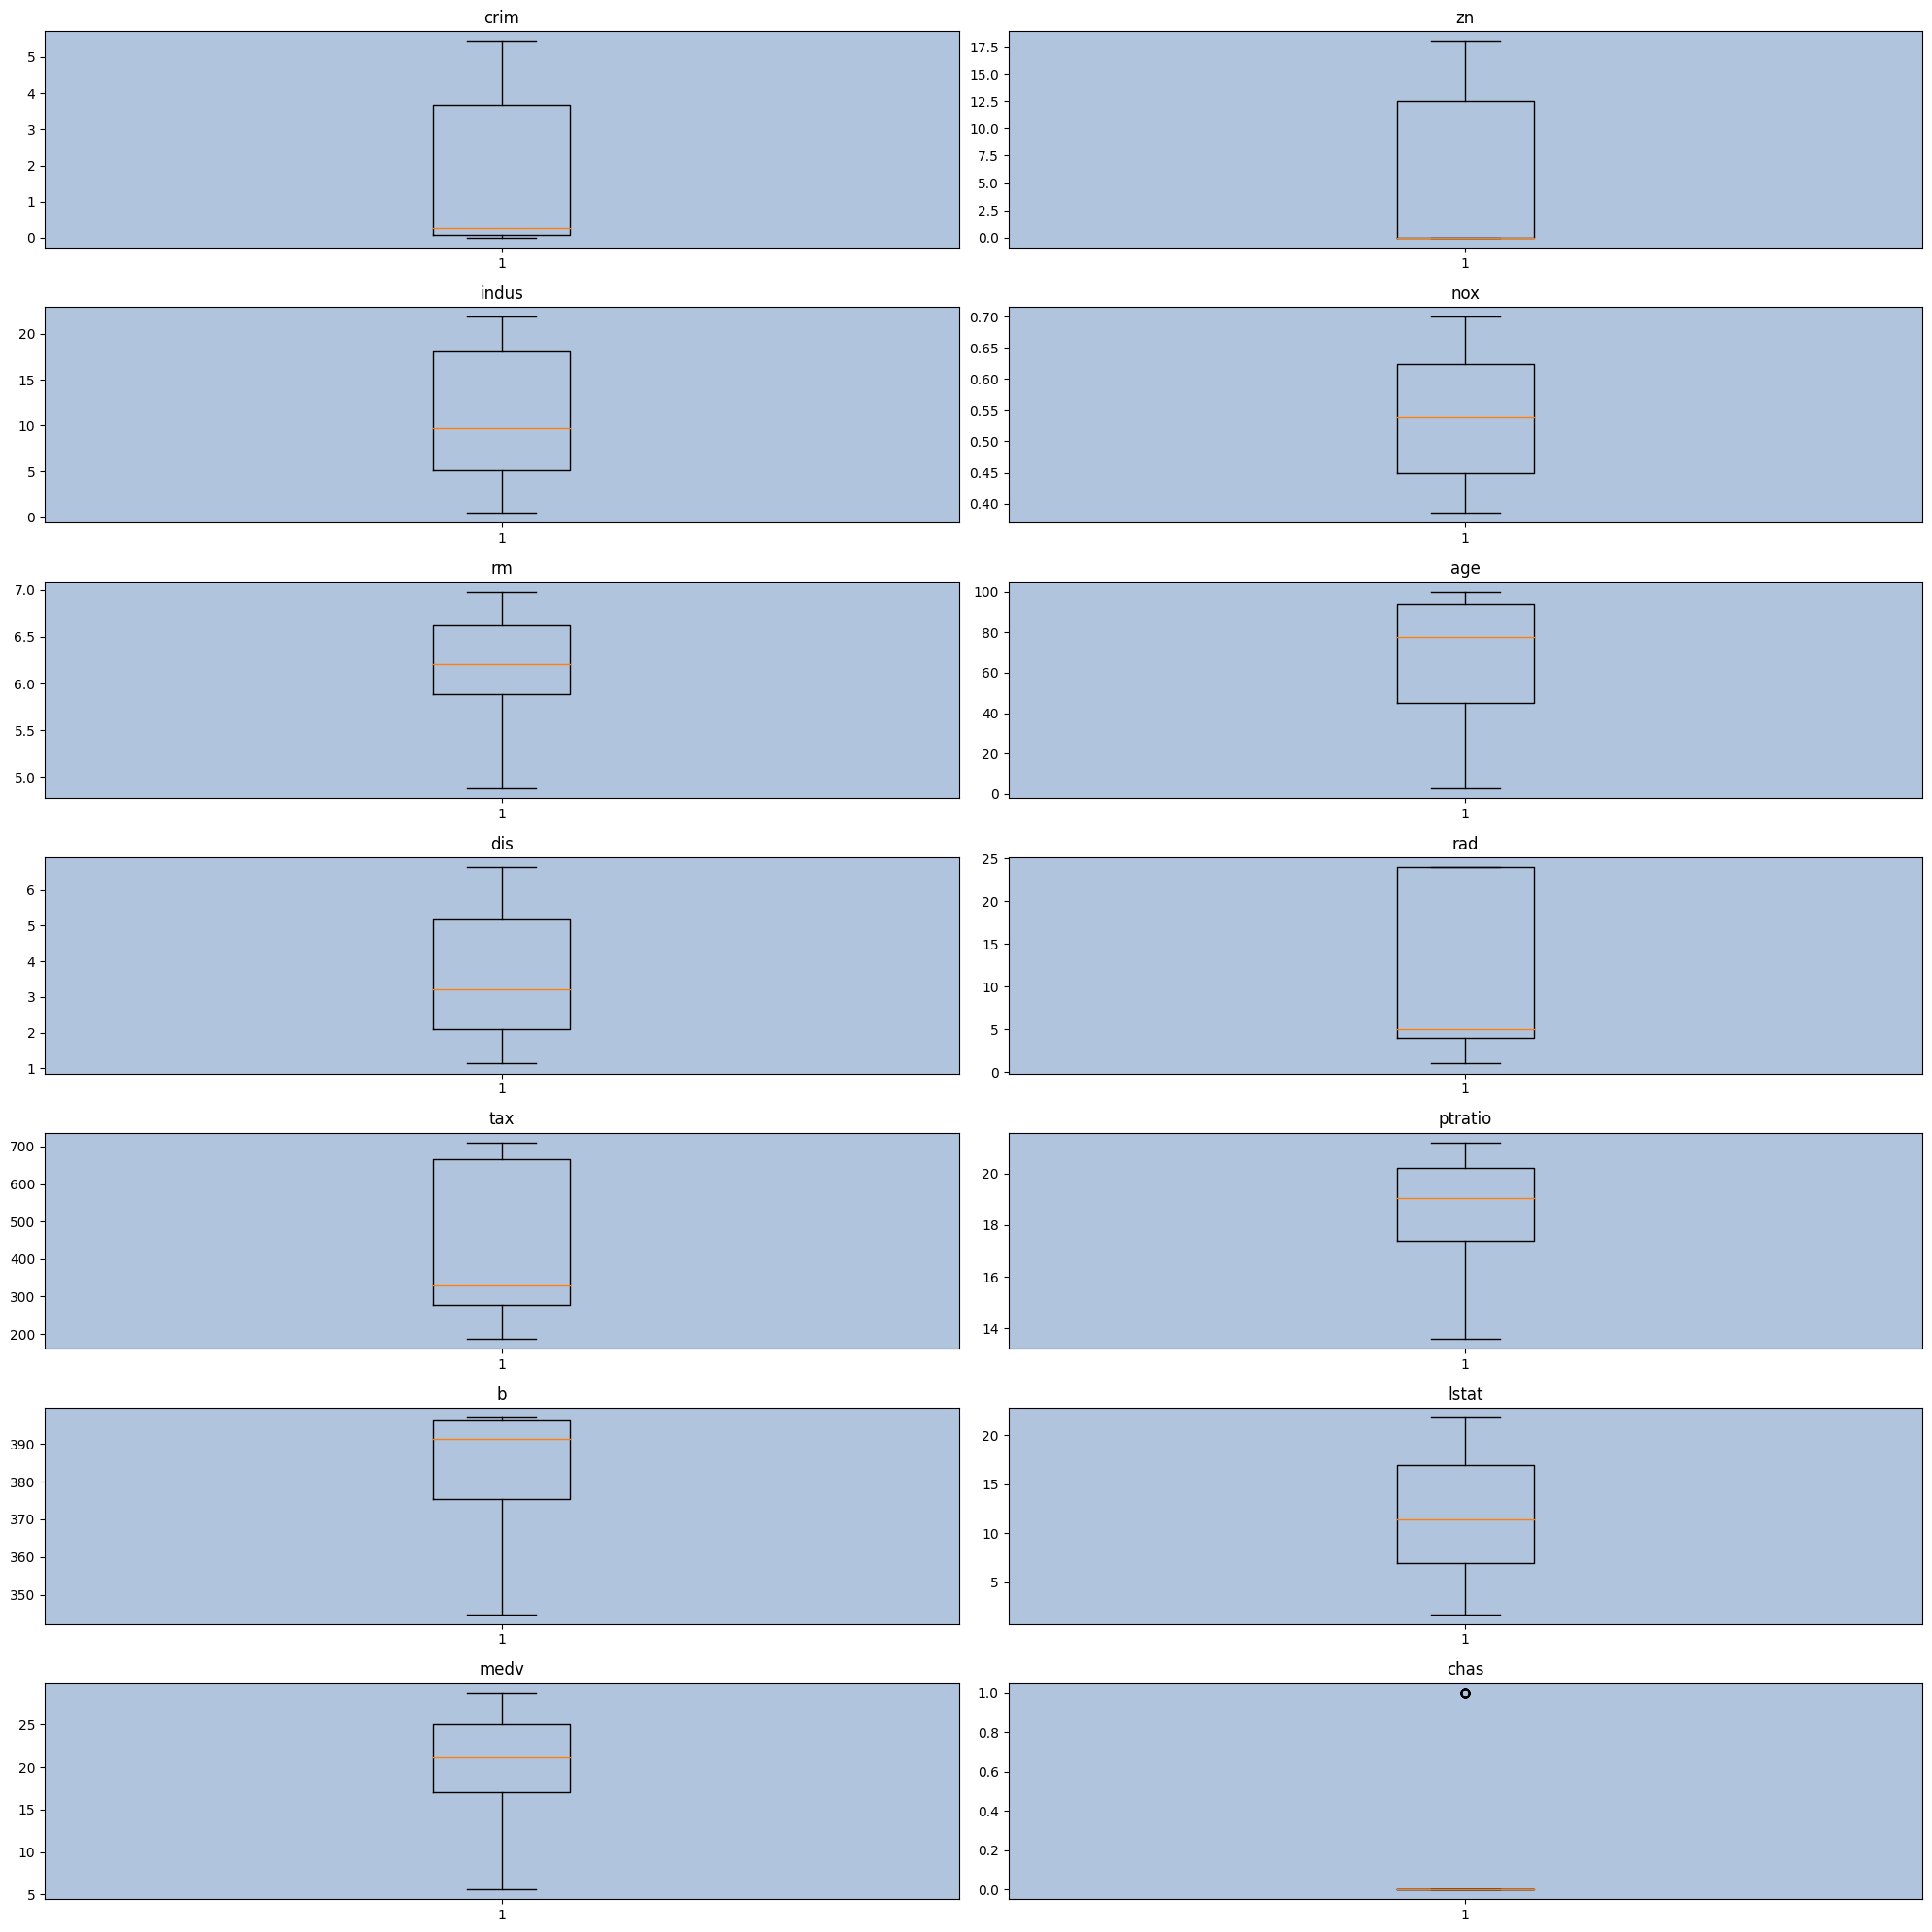

In [14]:
columns = df_rep.columns
fig, axes = plt.subplots(7,2, figsize = (20,20))
axes = axes.flatten()
for i in range(len(df.columns)):
    axes[i].boxplot(df_rep[columns[i]])
    axes[i].set_facecolor('lightsteelblue')
    axes[i].set_title(columns[i])
plt.tight_layout()
plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدیریت داده‌های پرت
۲
</font>
</h2>


$$‌ z = \frac{(x-\mu)}{\sigma} $$
$$ \small{z: \text{z-score}} $$
$$ \small{x: \text{value}} $$
$$ \small{\mu: \text{mean}} $$
$$ \small{\sigma: \text{standard deviation}} $$



In [168]:
df_zscore_pre = df.copy()


In [169]:
df_zscore_pre['dis_z_score'] = stats.zscore(df_zscore_pre['dis'])


In [170]:
index_zscore = df_zscore_pre[~(np.abs(df_zscore_pre['dis_z_score']) <= 3)].index

In [171]:
df_zscore = df_zscore_pre.drop(index_zscore, axis=0)
df_zscore.drop('dis_z_score', axis=1, inplace=True)

In [174]:
def iqr_based_filter_dis_col(columns, q1, q3):

    iqr = q3 - q1
    if columns < (q1 - 1.5 * iqr) or columns > (q1 + 1.5 * iqr):
        return None
    return columns

In [175]:
df_iqr_pre = df.copy()

In [176]:
q1, q3 = df_iqr_pre['dis'].quantile(0.25),  df_iqr_pre['dis'].quantile(0.75)
df_iqr_pre['test'] = df_iqr_pre['dis'].apply(lambda row: iqr_based_filter_dis_col(row, q1, q3))

In [177]:
index_iqr = df_iqr_pre[df_iqr_pre['test'].isna() == True].index

In [178]:
df_iqr = df.drop(index_iqr, axis=0)

In [193]:
var_difference = df_zscore.var() - df_iqr.var()

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بررسی آماری
</font>
</h1>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اولین فرضیه ای که باید بررسی کنید، این است که آیا خانه های قدیمی تر به مراکز شغلی درون بوستون نزدیک تر هستند یا خیر.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دقت کنید که متریک dis نشان دهنده ی فاصله ی خانه ها از مراکز اداری بوستون است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به ستون age، داده ها را به دو دسته تقسیم کنید و سپس تست فرض مربوطه را انجام دهید. معیار این تقسیم باید استفاده از میانه ی داده ها باشد.
</font>
</p>

Text(0.5, 1.0, 'dis')

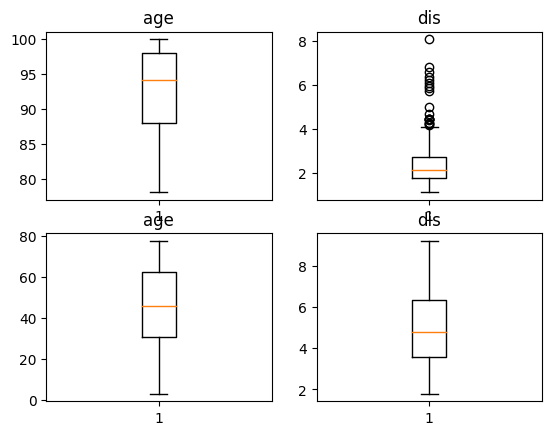

In [203]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
axes[0].boxplot(old_house['age'])
axes[0].set_title('age')
axes[1].boxplot(old_house['dis'])
axes[1].set_title('dis')
axes[2].boxplot(yung_house['age'])
axes[2].set_title('age')
axes[3].boxplot(yung_house['dis'])
axes[3].set_title('dis')

In [244]:
old_house = df_zscore[df_zscore['age'] > df_zscore['age'].median()]
yung_house = df_zscore[df_zscore['age'] < df_zscore['age'].median()]

In [245]:
t_stat, p_value = stats.ttest_ind(old_house['dis'], yung_house['dis'])

In [246]:
p_value

8.400663346509394e-64

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
فرضیه ی دومی که باید بررسی کنید، زیادتر بودن نیتریک اکسید در مناطقی است که مدرسه در آن ها زیاد است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
میزان نیتریک اکسید در یک منطقه در ستون nox، و نرخ تعداد دانش آموزان به معلمان در ستون ptratio قرار دارد.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به ستون ptratio، داده ها را به دو دسته تقسیم کنید و سپس تست فرض مربوطه را انجام دهید. معیار این تقسیم باید استفاده از میانه ی داده ها باشد.
</font>
</p>

In [224]:
h_ptratio = df_zscore[df_zscore['ptratio'] > df_zscore['ptratio'].median()]
l_ptratio = df_zscore[df_zscore['ptratio'] < df_zscore['ptratio'].median()]

In [226]:
p_value

3.7813696784061455e-25

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
سومین فرضیه ای که باید بررسی کنید این است که در مناطق پر تراکم تر، تعداد اتاق ها بیشتر است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ستون rm نمایانگر تعداد اتاق ها و ستون lstat شاخص کم بودن جمعیت است.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به ستون lstat، داده ها را به دو دسته تقسیم کنید و سپس تست فرض مربوطه را انجام دهید. معیار این تقسیم باید استفاده از میانگین داده ها باشد.
</font>
</p>

In [227]:
h_lstat = df_zscore[df_zscore['lstat'] > df_zscore['lstat'].mean()]
l_lstat = df_zscore[df_zscore['lstat'] < df_zscore['lstat'].mean()]

In [236]:
t_stat, p_value = stats.ttest_ind(h_lstat['rm'], l_lstat['rm'])

In [237]:
p_value

1.8638021285286992e-28